# Bender's Decomposition Testing

In [8]:
# Add the parent directory to the path
import sys, os
sys.path.insert(0, os.path.abspath("../.."))

# Import numpy and ShortestPathGrid class
import numpy as np
from src.models.ShortestPathGrid import ShortestPathGrid

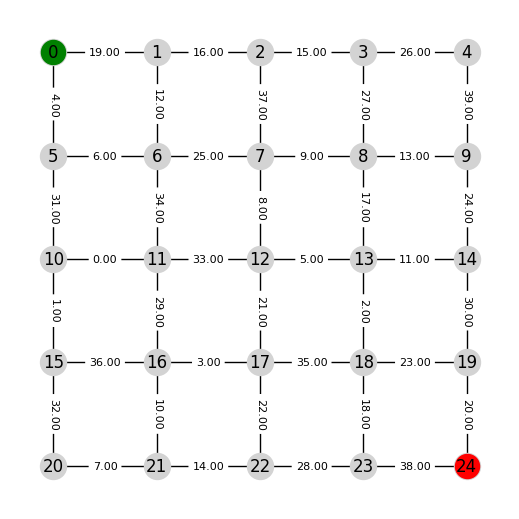

In [9]:
# Generate data
m, n = (5,5)  # grid size
np.random.seed(42)  # for reproducibility
# Create a random cost array for the grid
cost = np.arange((m-1)*n + m*(n-1))
np.random.shuffle(cost)
# Initialize the ShortestPathGrid with the cost array
grid = ShortestPathGrid(m, n, cost=cost)
# Visualize the grid
grid.visualize()

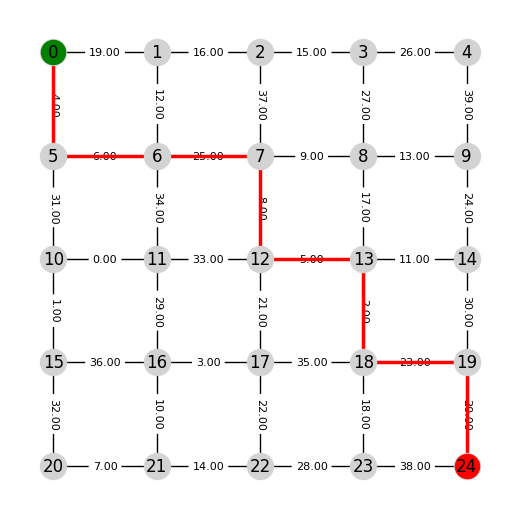

In [10]:
sol, obj = grid.solve()
grid.visualize(color_edges=sol)

In [11]:
# Define the interdiction cost
interdiction_cost = np.random.rand(grid.num_cost)*20

# Define Budget
k = 5

# Print the interdiction cost
interdiction_cost

array([ 9.00998504,  0.26529922, 18.84403511, 11.26576436,  7.70833005,
        0.31932504,  4.61787651,  4.82050932, 13.66527038, 12.19993316,
       16.66389823,  3.46729307,  7.82121215,  3.64472176, 15.10722821,
        8.50311749,  4.15883326, 11.35400656,  0.62626585, 16.84569549,
        8.99508267,  7.90300472, 18.53317732, 14.54543992,  6.53081538,
       11.40887949, 10.4166852 , 19.22344049, 16.89067697, 14.9464022 ,
       10.79384265, 11.73502331, 19.30510615, 12.14068495,  5.51998364,
        5.92547011,  3.30533878,  0.31272813,  8.46802961,  7.89763036])

In [12]:
from src.models.BendersDecomposition import BendersDecomposition

# Initialize the BendersDecomposition with the grid
benders = BendersDecomposition(grid, k, interdiction_cost)

In [13]:
interdictions_x, shortest_path_y, z_min = benders()

Iteration 1: z_max = 153.0616361936606, z_min = 93.0
Iteration 2: z_max = 151.99016533479062, z_min = 142.9950826673953
Iteration 3: z_max = 151.99016533479062, z_min = 151.99016533479062
------------------------
Found epsilon-optimal solution after 3 iterations with epsilon = 0.00


Original shortest path cost: 	93.00
New shortest path cost: 	151.99


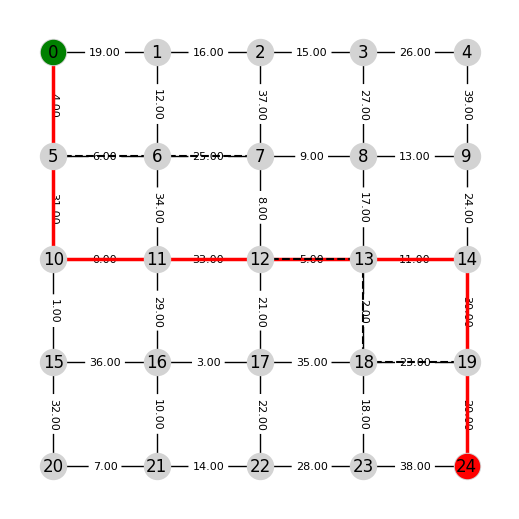

In [14]:
print(f"Original shortest path cost: \t{obj:.2f}\nNew shortest path cost: \t{z_min:.2f}")

grid.visualize(color_edges=shortest_path_y, dashed_edges=interdictions_x)